# Prepare the Data

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Reads the csv into pandas 
file_path = Path("Resources/myopia.csv")
df_myopia = pd.read_csv(file_path)
# Previews the DataFrame
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
# Removes the MYOPIC column from the dataset 
df = df_myopia.drop(columns=["MYOPIC"])
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
df.duplicated().sum()

0

In [5]:
# Standardises the dataset using a scaler
scaler = StandardScaler()


In [6]:
# Names the resulting DataFrame X
X = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


# Apply Dimensionality Reduction

In [7]:
# PCA model is created and used to reduce dimensions of the scaled dataset

# Instantiate PCA with the explained variance
pca = PCA(n_components=0.9)

# Fit and transform the standardized data with PCA
myopia_pca=pca.fit_transform(X)

In [8]:
# The shape of the reduced dataset is examined for reduction in number of features
print("Shape of the reduced dataset:", myopia_pca.shape)

Shape of the reduced dataset: (618, 10)


In [9]:
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [10]:
myopia_pca_df = pd.DataFrame(data=myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [11]:


tsne = TSNE(learning_rate=250)

# Transform the principal components with t-SNE
X_tsne = tsne.fit_transform(myopia_pca_df)

C:\Users\khans\anaconda3\envs\pythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [12]:
X_tsne.shape

(618, 2)

In [13]:
df_myopia["class"] = df_myopia ["MYOPIC"]

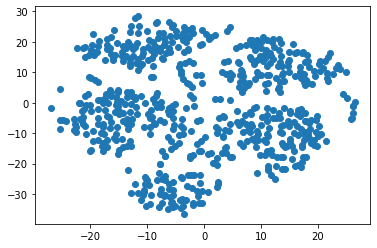

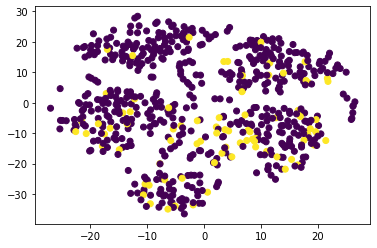

In [14]:

# t-SNE is used to create a scatter plot of the reduced features
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()


plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_myopia["class"])
plt.show()

### Are there distinct clusters
Based on the scatter plot of the t-SNE output, there appears to be some clustering patterns in the data. However, it is not completely clear as there is some overlap between the clusters. Further analysis may be needed to determine the exact number of clusters

# Perform a Cluster Analysis with K-means


In [15]:
tsne_df = pd.DataFrame(data=X_tsne, columns=['tsne_1', 'tsne_2'])

In [16]:
tsne_df 

,tsne_1,tsne_2
0,-4.082647,-7.524612
1,17.835047,-9.524882
2,-10.697721,16.184677
3,3.473130,13.534353
4,-22.900381,-9.014872
...,...,...
613,-1.194094,-5.932193
614,17.533222,-10.112783
615,16.610811,-10.692616
616,-4.898433,23.640028


C:\Users\khans\anaconda3\envs\pythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


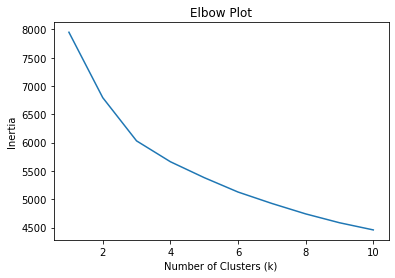

In [17]:
# Create an elbow plot to identify the best number of clusters
# Create a list to store the inertias
inertias = []

# Loop through k values from 1 to 10 and calculate the inertia for each k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(myopia_pca)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertias)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [18]:
def get_clusters(k, data):
    # Initialise the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [19]:
clusters = get_clusters(5, tsne_df )

In [20]:
clusters 

,tsne_1,tsne_2,class
0,-4.082647,-7.524612,4
1,17.835047,-9.524882,2
2,-10.697721,16.184677,0
3,3.473130,13.534353,3
4,-22.900381,-9.014872,4
...,...,...,...
613,-1.194094,-5.932193,4
614,17.533222,-10.112783,2
615,16.610811,-10.692616,2
616,-4.898433,23.640028,0


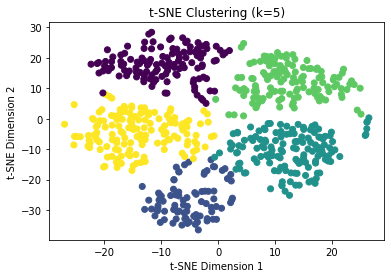

In [21]:
plt.scatter(clusters['tsne_1'], clusters['tsne_2'], c=clusters['class'], cmap='viridis')
plt.title('t-SNE Clustering (k=5)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

# Make a Recommendation

# States a brief (1-2 sentence) conclusion on whether patients can be clustered together, and supports it with findings
The elbow plot showed an inflection point at k=5, indicating that 5 clusters may be optimal for this dataset. Additionally, the scatter plot of the t-SNE output showed some clustering patterns with some overlap between the clusters. Finally, the k-means model was trained with k=5, and the resulting clusters were visualized in the scatter plot. These findings suggest that there are distinct groups of patients within the myopia dataset that may be better analyzed separately